In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
%matplotlib inline 
sns.set(style="ticks")

In [94]:
# Загружаем выборку в pandas
data = pd.read_csv('personality_dataset.csv', sep=",")
print(data.dtypes)

# Проверка пропущенных значений
print(data.isnull().sum())

Time_spent_Alone             float64
Stage_fear                    object
Social_event_attendance      float64
Going_outside                float64
Drained_after_socializing     object
Friends_circle_size          float64
Post_frequency               float64
Personality                   object
dtype: object
Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64


In [95]:

# Заполнение пропущенных значений (например, средним или модой)
# Для числовых столбцов
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Для категориальных столбцов
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

# Проверка пропущенных значений
print(data.isnull().sum())

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64


In [96]:
# Первые 5 строк датасета
data.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [97]:
# Размер
data.shape

(2900, 8)

In [98]:
# Основные статистические характеристки набора данных
data.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.441180,2.872608,2.221597,4.232340,2.893587
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.963354,3.000000,5.000000,3.000000
75%,7.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [99]:
# Определим уникальные значения для категориальных признаков
print(data['Personality'].unique())
print(data['Stage_fear'].unique())
print(data['Drained_after_socializing'].unique())

['Extrovert' 'Introvert']
['No' 'Yes']
['No' 'Yes']


In [100]:
from sklearn.preprocessing import LabelEncoder
# Копируем данные, чтобы не изменять исходные
data_encoded = data.copy()

# Кодируем бинарные категориальные признаки
binary_cols = ['Stage_fear', 'Drained_after_socializing', 'Personality']
for col in binary_cols:
    data_encoded[col] = LabelEncoder().fit_transform(data_encoded[col])

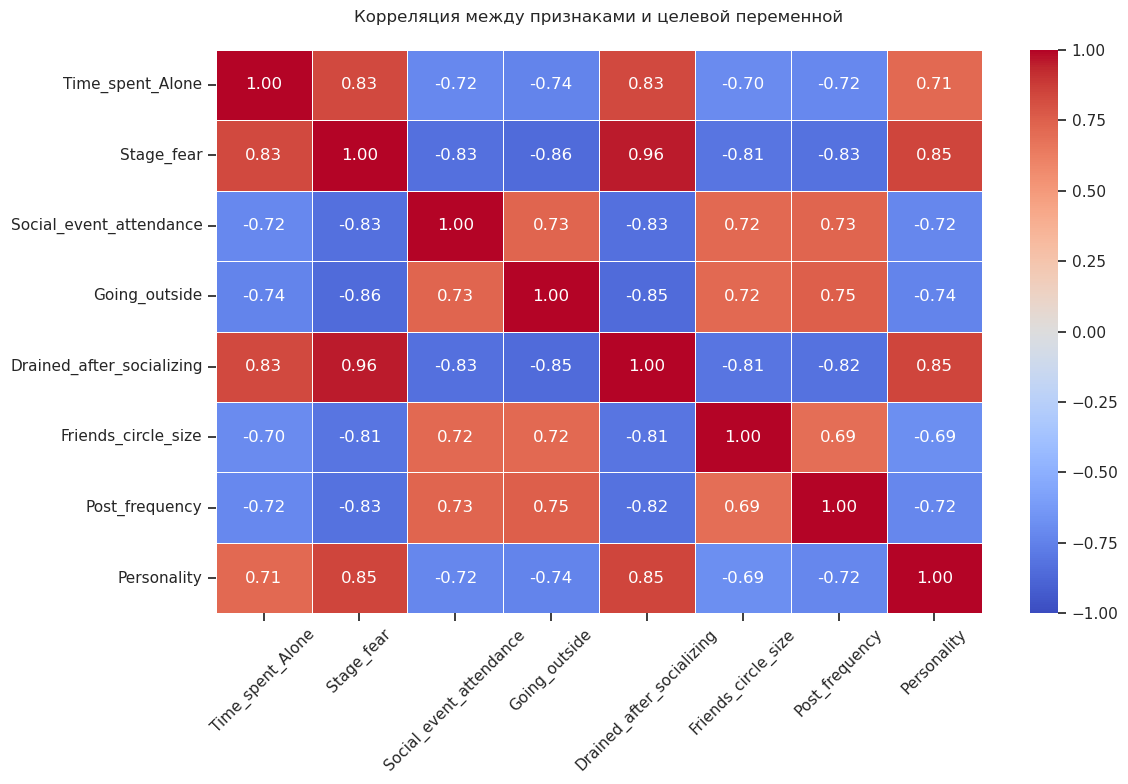

In [101]:
# Вычисляем корреляционную матрицу
corr_matrix = data_encoded.corr()

# Настраиваем размер графика
plt.figure(figsize=(12, 8))

# Строим heatmap
sns.heatmap(
    corr_matrix,
    annot=True,     # Показывать значения в ячейках
    fmt=".2f",      # Формат чисел (2 знака после запятой)
    cmap="coolwarm", # Цветовая схема
    linewidths=0.5,  # Толщина линий между ячейками
    vmin=-1,        # Минимальное значение корреляции
    vmax=1          # Максимальное значение корреляции
)

# Добавляем заголовок
plt.title("Корреляция между признаками и целевой переменной", pad=20)

# Поворачиваем подписи осей X для удобства
plt.xticks(rotation=45)

# Показываем график
plt.tight_layout()
plt.show()

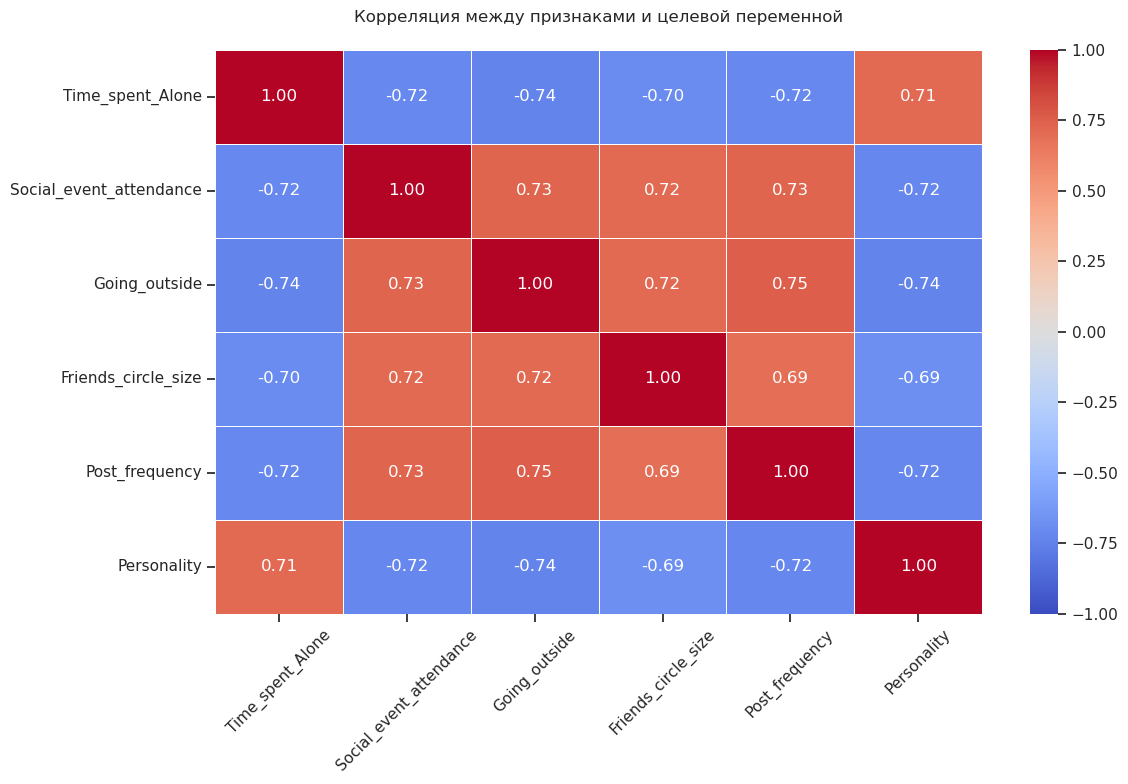

In [102]:
# имеет смысл исключить признаки Stage_fear, Drained_after_socializing из-за сильной корреляции с Time_spend_Alone
# Вычисляем корреляционную матрицу по отобранным признакам
data_clean = data_encoded[['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency', 'Personality']]
corr_matrix = data_clean.corr()

# Настраиваем размер графика
plt.figure(figsize=(12, 8))

# Строим heatmap
sns.heatmap(
    corr_matrix,
    annot=True,     # Показывать значения в ячейках
    fmt=".2f",      # Формат чисел (2 знака после запятой)
    cmap="coolwarm", # Цветовая схема
    linewidths=0.5,  # Толщина линий между ячейками
    vmin=-1,        # Минимальное значение корреляции
    vmax=1          # Максимальное значение корреляции
)

# Добавляем заголовок
plt.title("Корреляция между признаками и целевой переменной", pad=20)

# Поворачиваем подписи осей X для удобства
plt.xticks(rotation=45)

# Показываем график
plt.tight_layout()
plt.show()

In [103]:
# Отделяем признаки (X) и целевую переменную (y)
X = data_clean.drop('Personality', axis=1)
y = data_clean['Personality']

# Разделяем данные (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,  # для воспроизводимости
    stratify=y        # сохраняет баланс классов (если важно)
)

# Проверяем размеры
print("Train:", X_train.shape, y_train.shape)
print("Test:", X_test.shape, y_test.shape)

Train: (2320, 5) (2320,)
Test: (580, 5) (580,)


In [104]:
# Модели
clas_models = {'LogR': LogisticRegression(), 
               'KNN_5':KNeighborsClassifier(n_neighbors=5),
               'SVC':SVC(probability=True),
               'Tree':DecisionTreeClassifier(),
               'RF':RandomForestClassifier(),
               'GB':GradientBoostingClassifier()}

In [105]:

class MetricLogger:
    
    def __init__(self):
        """Инициализация пустого DataFrame для хранения метрик"""
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
             'alg': pd.Series([], dtype='str'),
             'value': pd.Series([], dtype='float')})
    
    def add(self, metric: str, alg: str, value: float) -> None:
        """
        Добавление значения метрики для алгоритма
        
        Параметры:
            metric (str): Название метрики
            alg (str): Название алгоритма
            value (float): Значение метрики
        """
        # Удаление предыдущего значения для этой пары метрика-алгоритм
        mask = (self.df['metric'] == metric) & (self.df['alg'] == alg)
        self.df = self.df[~mask]
        
        # Добавление нового значения
        new_row = pd.DataFrame({'metric': [metric], 'alg': [alg], 'value': [value]})
        self.df = pd.concat([self.df, new_row], ignore_index=True)
    
    def get_data_for_metric(self, metric: str, ascending: bool = True) -> tuple:
        """
        Получение данных для конкретной метрики
        
        Параметры:
            metric (str): Название метрики
            ascending (bool): Сортировка по возрастанию/убыванию
            
        Возвращает:
            tuple: (алгоритмы, значения) отсортированные по значению
        """
        temp_data = self.df[self.df['metric'] == metric]
        temp_data = temp_data.sort_values('value', ascending=ascending)
        return temp_data['alg'].values, temp_data['value'].values
    
    def plot(self, title: str, metric: str, ascending: bool = True, figsize: tuple = (5, 5)) -> None:
        """
        Визуализация метрик в виде горизонтальных барплотов
        
        Параметры:
            title (str): Заголовок графика
            metric (str): Название метрики для отображения
            ascending (bool): Сортировка по возрастанию/убыванию
            figsize (tuple): Размер графика
        """
        algorithms, values = self.get_data_for_metric(metric, ascending)
        
        fig, ax = plt.subplots(figsize=figsize)
        y_pos = np.arange(len(algorithms))
        
        bars = ax.barh(y_pos, values, align='center', height=0.5)
        ax.set_yticks(y_pos)
        ax.set_yticklabels(algorithms)
        ax.set_xlabel('Значение метрики')
        ax.set_title(title)
        
        # Добавление значений на бары
        for i, v in enumerate(values):
            ax.text(v/2, i, f'{v:.3f}', color='white', va='center', ha='center')
        
        plt.tight_layout()
        plt.show()

In [106]:
# Сохранение метрик
clasMetricLogger = MetricLogger()

In [107]:
# Отрисовка ROC-кривой
def draw_roc_curve(y_true, y_score, ax, pos_label=1, average='micro'):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    #plt.figure()
    lw = 2
    ax.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_xlim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")

In [108]:
def train_model(model_name, model, clasMetricLogger):
    fitted_model = model.fit(X_train, y_train)
    # Предсказание значений
    y_pred = fitted_model.predict(X_test)
    # Предсказание вероятности класса "1" для roc auc
    y_pred_proba_temp = fitted_model.predict_proba(X_test)
    y_pred_proba = y_pred_proba_temp[:,1]
    
    precision = precision_score(y_test.values, y_pred)
    recall = recall_score(y_test.values, y_pred)
    f1 = f1_score(y_test.values, y_pred)
    roc_auc = roc_auc_score(y_test.values, y_pred_proba)
    
    clasMetricLogger.add('precision', model_name, precision)
    clasMetricLogger.add('recall', model_name, recall)
    clasMetricLogger.add('f1', model_name, f1)
    clasMetricLogger.add('roc_auc', model_name, roc_auc)

    fig, ax = plt.subplots(ncols=2, figsize=(10,5))    
    draw_roc_curve(y_test.values, y_pred_proba, ax[0])
    # Исправленная строка: используем ConfusionMatrixDisplay правильно
    cm = confusion_matrix(y_test.values, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0','1'])
    disp.plot(cmap=plt.cm.Blues, ax=ax[1], values_format='.2f')
    fig.suptitle(model_name)
    plt.show()

LogR
LogisticRegression()


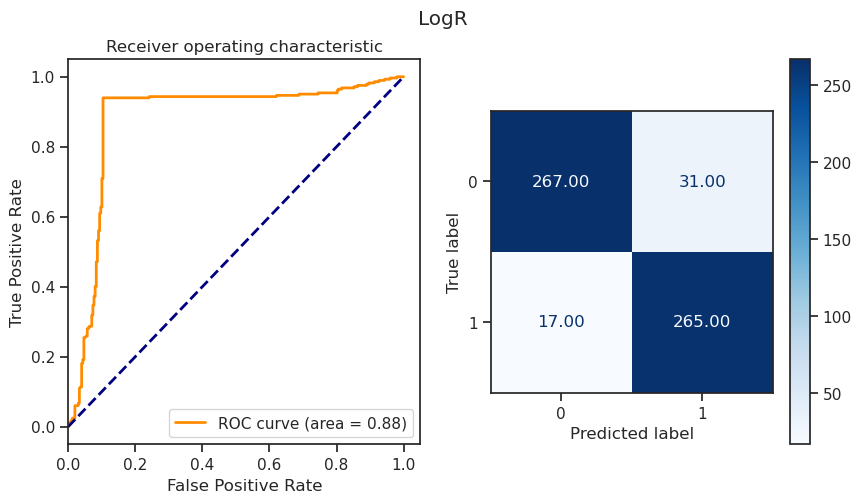

KNN_5
KNeighborsClassifier()


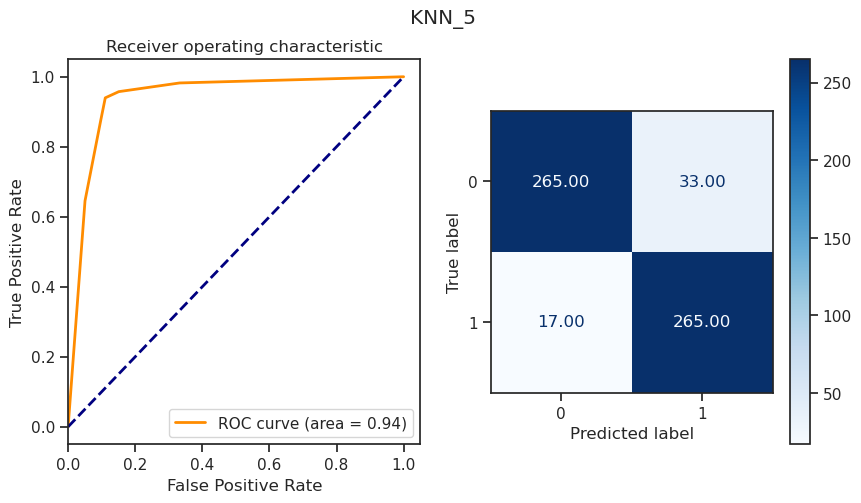

SVC
SVC(probability=True)


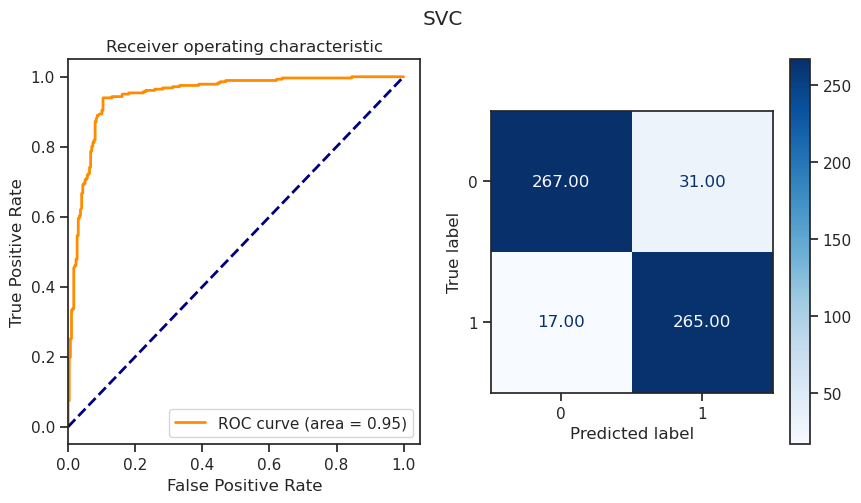

Tree
DecisionTreeClassifier()


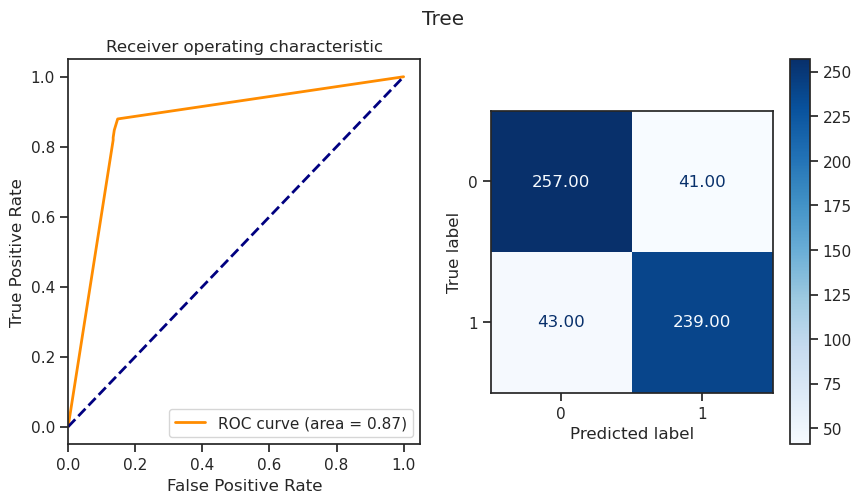

RF
RandomForestClassifier()


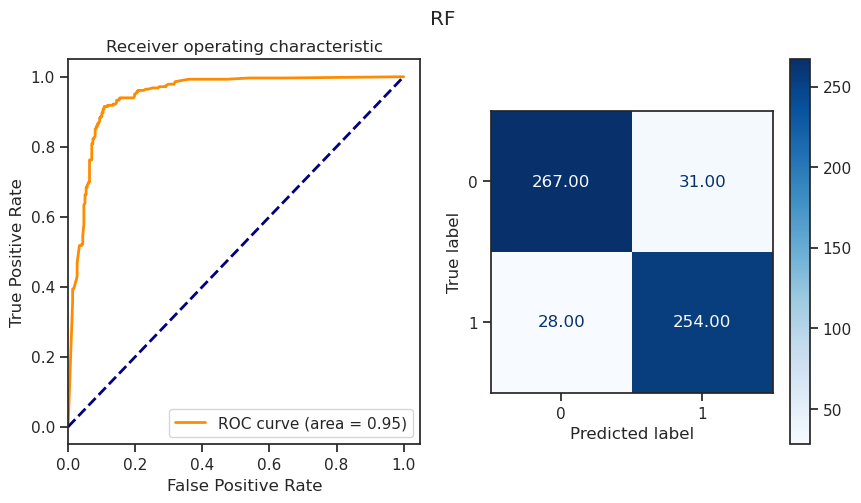

GB
GradientBoostingClassifier()


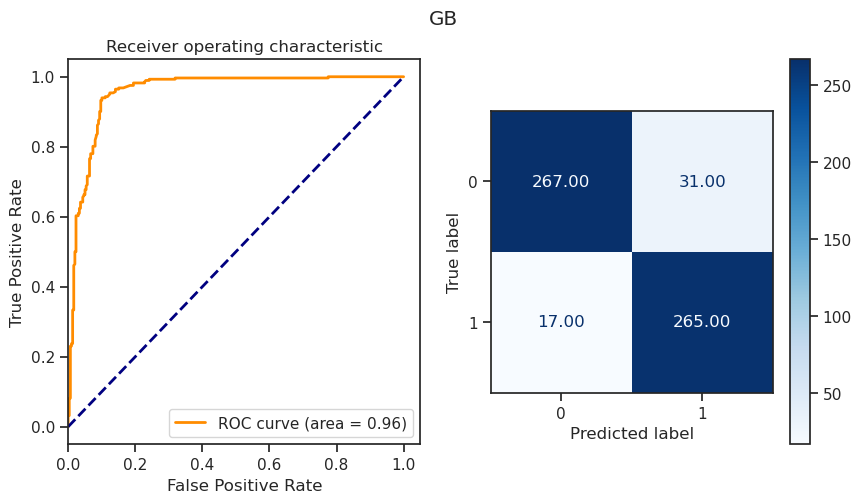

In [109]:
for model_name, model in clas_models.items():
    print(model_name)
    print(model)
    train_model(model_name, model, clasMetricLogger)

In [110]:
# Метрики качества модели
clas_metrics = clasMetricLogger.df['metric'].unique()
clas_metrics

array(['precision', 'recall', 'f1', 'roc_auc'], dtype=object)

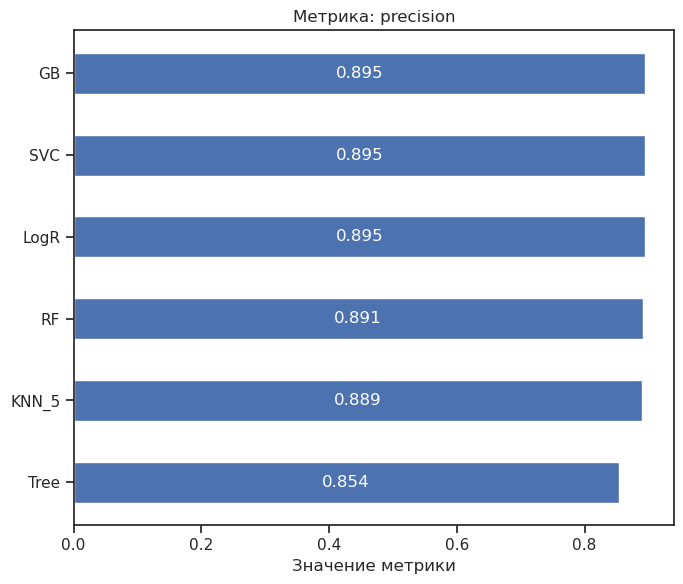

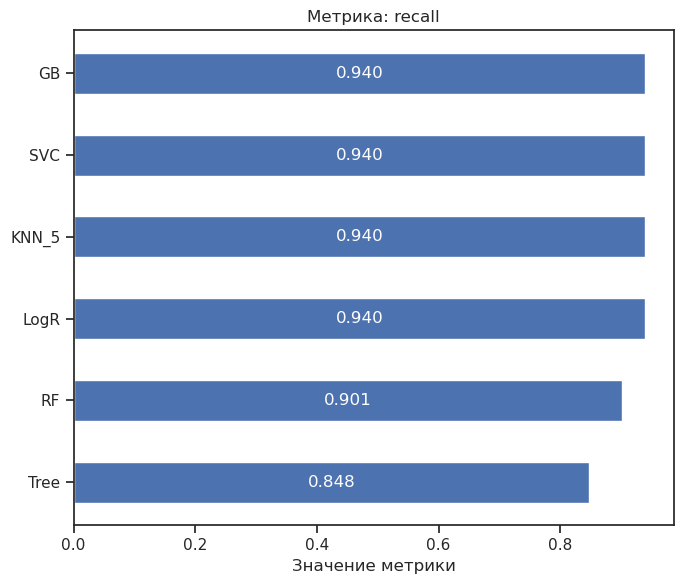

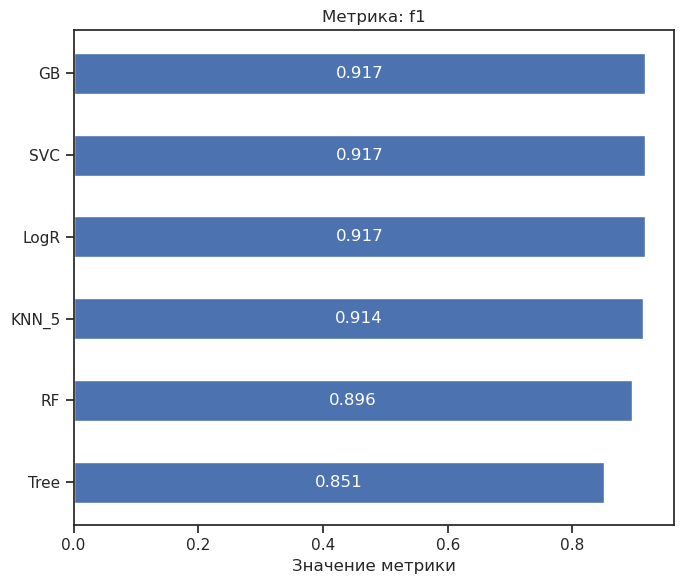

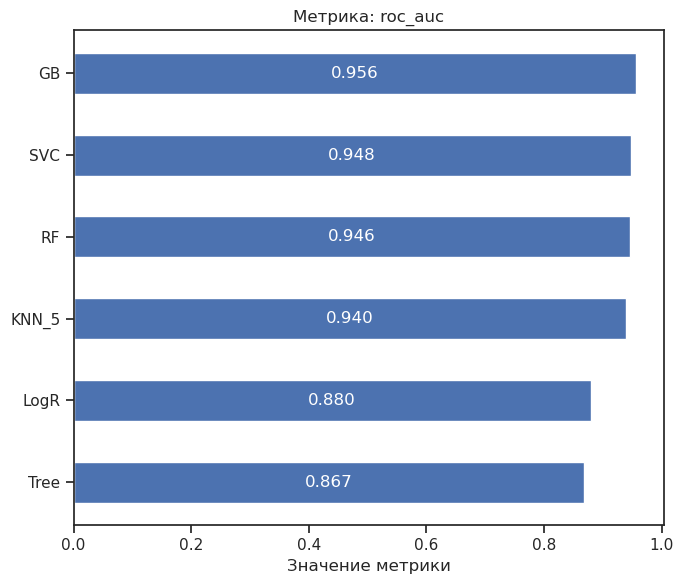

In [111]:
# Построим графики метрик качества модели
for metric in clas_metrics:
    clasMetricLogger.plot('Метрика: ' + metric, metric, figsize=(7, 6))